In [32]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

In [2]:
spec = Veldis('../spectra_extraction/spec1d_J0924_coadd_gauss_secondary.fits', informat='fits',
              trimsec=[14618, 16421])


Reading spectrum from ../spectra_extraction/spec1d_J0924_coadd_gauss_secondary.fits
Expected file format: fits
 Spectrum Start:  7094.91
 Spectrum End:     7597.66
 Dispersion (1st pixel):   0.27
 Dispersion (average):      0.28




Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg I (b)      5176.00       7215.34



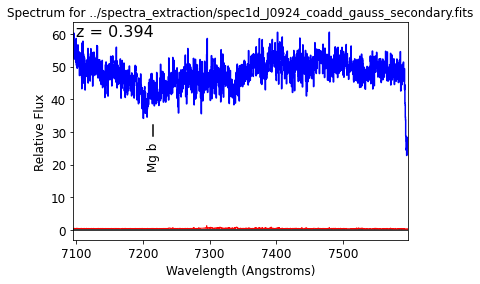

In [3]:
#%matplotlib notebook
s = spec.plot()
spec.mark_lines('abs', z=0.394)

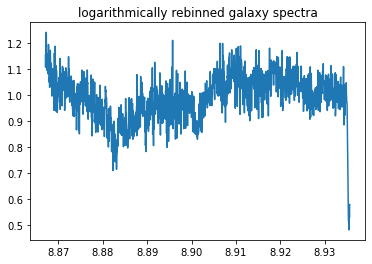

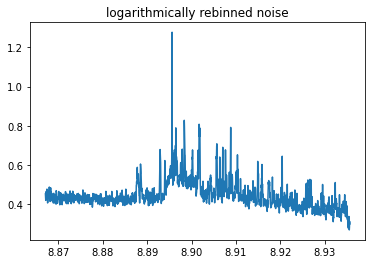

In [4]:
#%matplotlib notebook
spec.cal_parm(z=0.394, norm=False)

In [5]:
mask_reg = [(8.8370, 8.8716), (8.9346, 8.9500)] # (8.8954, 8.8960),

vsyst = -214850.835209 

As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value


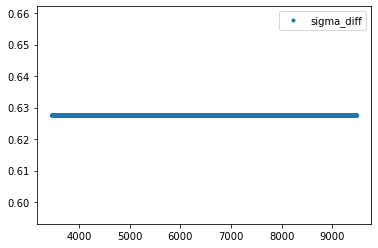

In [6]:
temp_spec = spec.gen_rebinned_temp(lib_path='../TEXT/*', sig_ins=0.85)


degree : 2
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     99506       299    -0.094     0.195
chi2/DOF: 0.01177; degree = 2; mdegree = 0
method = capfit; Jac calls: 11; Func calls: 60; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  30 / 1251
572, 12.597689

degree : 3
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     99542       225     0.032     0.095
chi2/DOF: 0.01187; degree = 3; mdegree = 0
method = capfit; Jac calls: 5; Func calls: 27; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%):  1 / 1251
572, 19667.134198

degree : 4
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     99497       293    -0.088     0.186
chi2/DOF: 0.01175; degree = 4; mdegree = 0
method = capfit; Jac calls: 12; Func calls: 66; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%):  22 / 1251
572, 23.542902

degree : 5
 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     99541       198     0.025     0.005
chi2/D

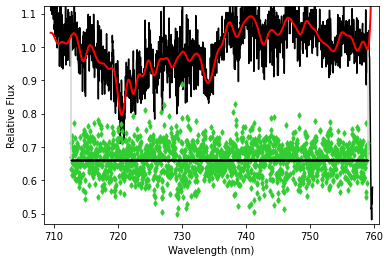

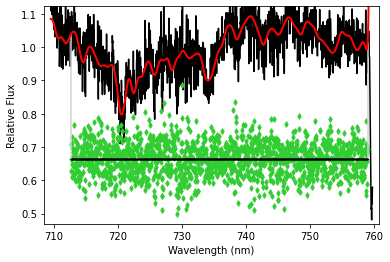

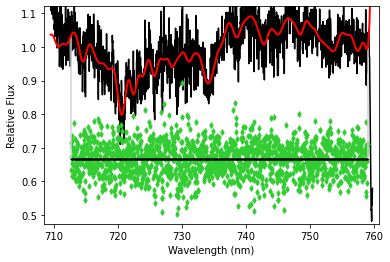

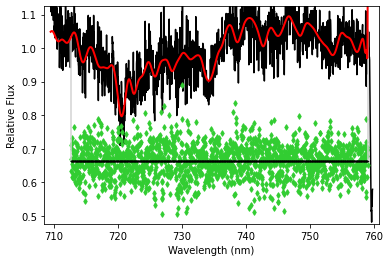

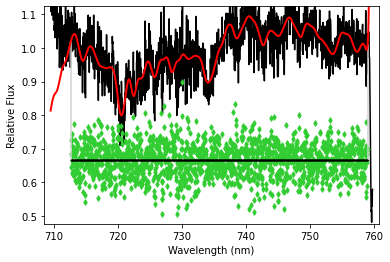

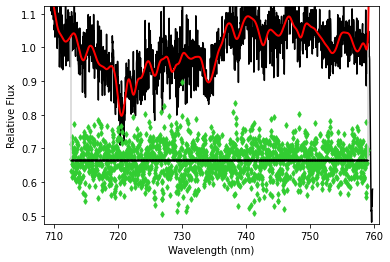

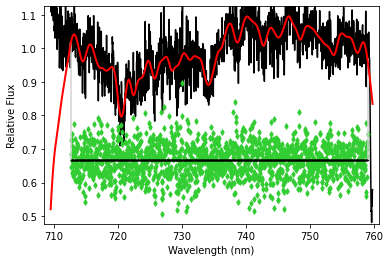

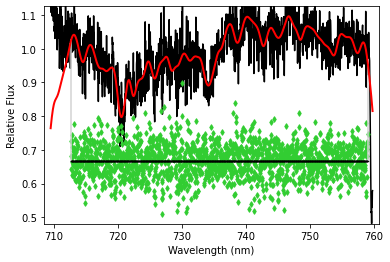

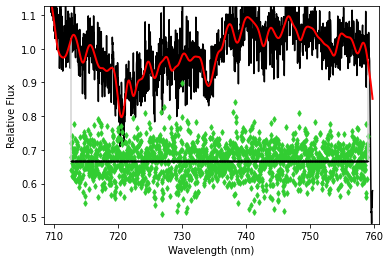

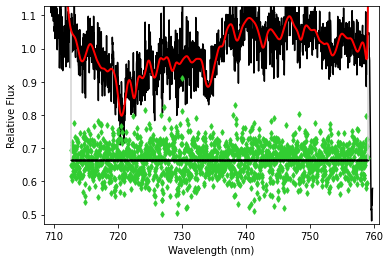

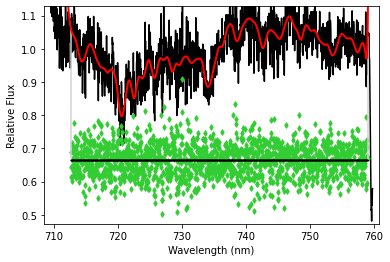

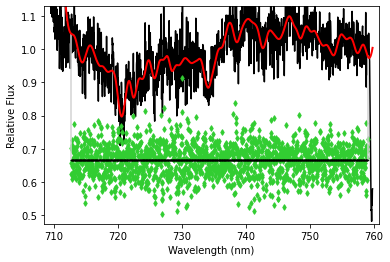

<Figure size 432x288 with 0 Axes>

In [7]:
spec.cal_veldis(temp_spec=temp_spec, degree=[2, 14], mask_reg=mask_reg, show_weight=True)

(710.0, 760.0)

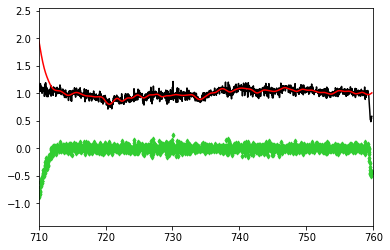

In [36]:
lam = np.exp(spec.wav_rebinned)/10
#plt.figure(figsize=(7,5))
plt.plot(lam, spec.flux_rebinned, 'k')
plt.plot(lam, spec.best_fit[-1], 'r')
plt.plot(lam, spec.flux_rebinned-spec.best_fit[-1], 'd', markersize=3.5, color='LimeGreen')
plt.xlim(710, 760)
#plt.ylim(-0.3, 1.2)

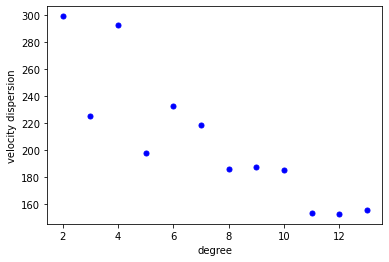

In [8]:
spec.plot_veldis()

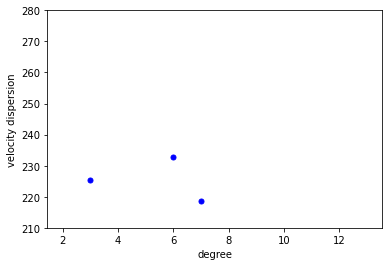

In [9]:
spec.plot_veldis(ylim=[210, 280])

In [37]:
residuals = []

for i, l in enumerate(spec.best_fit):
    residuals.append(spec.flux_rebinned - l)
    
r = np.array(residuals).flatten()

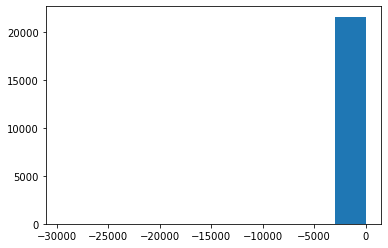

In [39]:
count = plt.hist(r, bins=10)

In [ ]:
norm_val = len(r)*np.diff(count[1])[0]

def gauss(x, mu, sigma):
    
    return norm.pdf(x, loc=mu, scale=sigma) *norm_val

In [ ]:
x = count[1][:-1] + np.diff(count[1])*0.5

In [ ]:
parm, covar = curve_fit(gauss, x, count[0])
parm

In [ ]:
y_norm = gauss(x, parm[0], parm[1])

In [41]:
len(r)

21636